# <a name='link0'>Introduction</a>

Market penetration and customer service are two main goals of any business that wants to survive. As far as banking business is concerned, one important sector for market penetration is without contest the credit cards service for it is a big source of revenue for banks. For achieving these goals, customers segmentation can be a great tool to help understang differents groups within customers and their characteristics. Using data from AllLife Bank, we are building clustering machine learning models to segment the customers and reveal the insights.

The present work is structured as follow:

- <a href = #link0>Introduction</a>
- <a href = #link1>Loading necessary packages and data overview</a>
    - <a href = #link11>Loading packages</a>
    - <a href = #link12>Loding dataset and data Overview</a>
- <a href = #link2>Exploratory Data Analysis</a>
    - <a href = #link21>Univariate Analysis</a>
    - <a href = #link22>Bivariate Analysis</a>
- <a href = #link3>Data preprocessing</a>
- <a href = #link4>Modeling</a>
    - <a href = #link41>K-means clustering</a>
    - <a href = #link42>Hierarchical clustering</a>
    - <a href = #link43>Comparing K-means and Hierarchical clustering</a>
- <a href = #link5>Conclusion</a>

# <a name='link1'>1. Loading necessary packages and data overview</a>

## <a name='link11'>1.1. Loading packages</a>

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

# <a name='link12'>1.2. Loading data set and data overview</a>

In [3]:
# Loading the dataset and making a copy

data = pd.read_excel("Credit Card Customer data.xlsx")
df = data.copy()

<IPython.core.display.Javascript object>

In [4]:
# Checking the shape of the dataset
df.shape

(660, 7)

<IPython.core.display.Javascript object>

Dataset contains 660 observations and 7 variables.

In [5]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

Notes: 
    
- All data variables are of type integer.
- There is no missing value in the dataset.

In [7]:
# Checking for duplicated observations

df.duplicated().sum()

0

<IPython.core.display.Javascript object>

There is no duplicated observation.

In [8]:
# Checking if all customers have unique key identification

df["Customer Key"].nunique()

655

<IPython.core.display.Javascript object>

There are 655 unique `Customer Key` for 660 observations. So there are observations sharing the same `Customer Key` which is supposed to be unique.

In [9]:
# Checking duplicated Customer Key
df["Customer Key"].value_counts()

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64

<IPython.core.display.Javascript object>

Five `Customer Key` are duplicated.

In [10]:
# Displaying observations with duplicated Customer Key

keys = [47437, 37252, 97935, 96929, 50706]
df[df["Customer Key"].isin(keys)]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
48,49,37252,6000,4,0,2,8
104,105,97935,17000,2,1,2,10
332,333,47437,17000,7,3,1,0
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
411,412,50706,44000,4,5,0,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

**Note:**

Observations with the same `Customer Key` more likely hold informations about the same customer. The different observations are therefore data of the same customer not consolidated but splitted in different rows. We are going to consolidate them by adding them up.  

In [11]:
# Code to add up variables for customers with the same key
cols = [
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made",
]
for i in df.index:
    for j in range(i + 1, df.index.max()):
        if df.loc[i, "Customer Key"] == df.loc[j, "Customer Key"]:
            for c in cols:
                df.loc[i, c] = df.loc[i, c] + df.loc[j, c]
                df.loc[j, c] = df.loc[i, c]

<IPython.core.display.Javascript object>

In [12]:
# Checking if the code did work properly

df[df["Customer Key"].isin(keys)]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,117000,13,3,13,3
48,49,37252,65000,10,2,3,10
104,105,97935,204000,9,2,9,10
332,333,47437,117000,13,3,13,3
391,392,96929,80000,10,7,2,2
398,399,96929,80000,10,7,2,2
411,412,50706,104000,11,10,2,4
432,433,37252,65000,10,2,3,10
541,542,50706,104000,11,10,2,4
632,633,97935,204000,9,2,9,10


<IPython.core.display.Javascript object>

In [13]:
# Dropping duplicated observations

df = df[~df["Customer Key"].duplicated()]

<IPython.core.display.Javascript object>

In [14]:
# DEscriptive statistic of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,655.0,329.450382,190.788562,1.0,164.5,328.0,494.5,660.0
Customer Key,655.0,55058.158779,25606.965469,11265.0,33623.5,53898.0,77084.5,99843.0
Avg_Credit_Limit,655.0,34838.167939,38000.419397,3000.0,10000.0,18000.0,48500.0,204000.0
Total_Credit_Cards,655.0,4.741985,2.229012,1.0,3.0,5.0,6.0,13.0
Total_visits_bank,655.0,2.421374,1.657944,0.0,1.0,2.0,4.0,10.0
Total_visits_online,655.0,2.625954,2.952571,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.610687,2.869678,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

Observations: 

- `Avg_Credit_Limit` has a very wide range of values from 3000 all the way to 204000.
- The other variables range only to 15 at most.
- `Sl_No` and `Customer Key` are not relevant for our analysis, so we will drop them.

In [15]:
# Dropping Sl_No and Customer Key

df.drop(columns=["Sl_No", "Customer Key"], inplace=True)

<IPython.core.display.Javascript object>

# <a name='link2'>2. Exploratory Data Analysis</a>

# <a name='link21'>2.1. Univariate analysis</a>

In [59]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observation of `Avg_Credit_Limit`

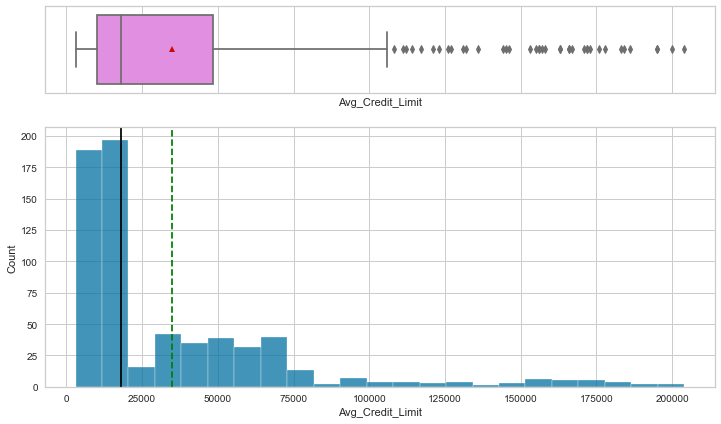

<IPython.core.display.Javascript object>

In [241]:
histogram_boxplot(df, "Avg_Credit_Limit")

- Credit limit typically ranges from 10,000 to around 48500 with a mean of 35,000.
-  We do notice some extreme values up to 200,000 which are plausibles based on credit history. 

### Observation of `Total_Credit_Cards`

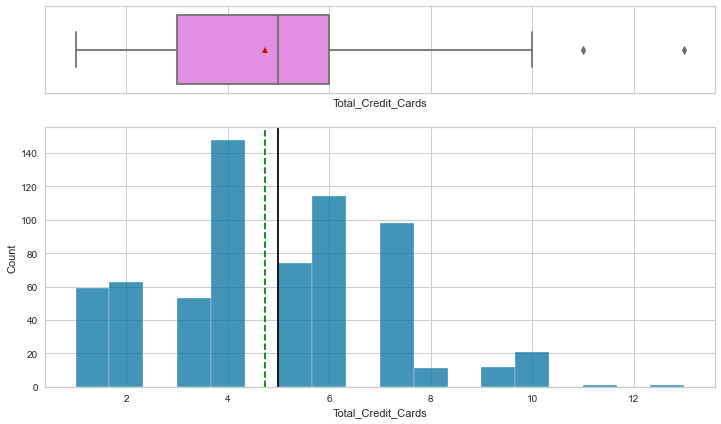

<IPython.core.display.Javascript object>

In [244]:
histogram_boxplot(df, "Total_Credit_Cards")

- Customers have up to 12 differents credit cards.
- Majority of them possess between 4 to 6 credit cards.

### Observation of `Total_visits_bank`

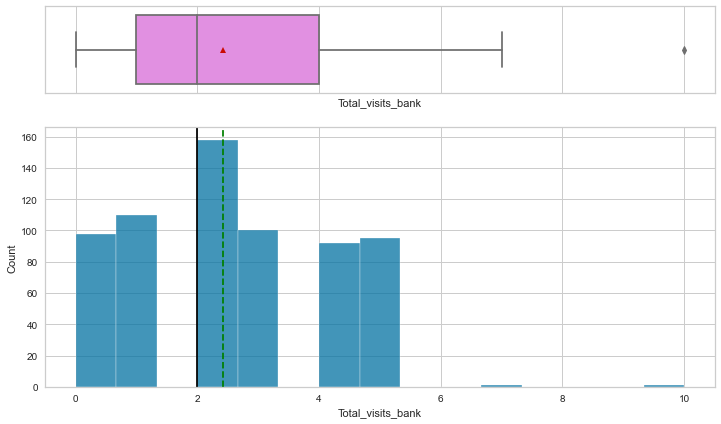

<IPython.core.display.Javascript object>

In [62]:
histogram_boxplot(df, "Total_visits_bank")

Customers typically visited the bank between zero and 5 times.

### Observation of `Total_visits_online`

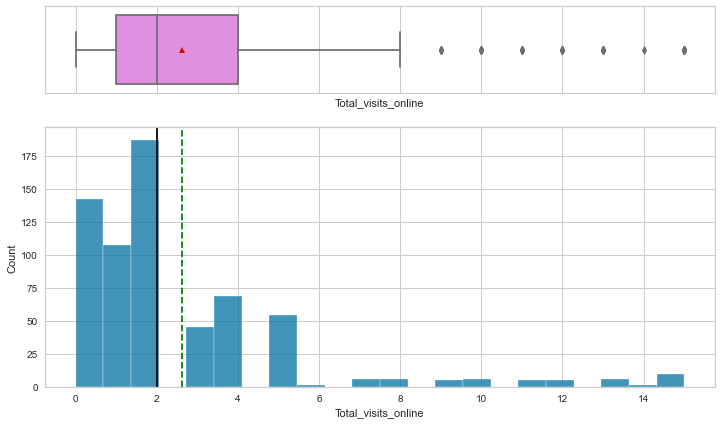

<IPython.core.display.Javascript object>

In [63]:
histogram_boxplot(df, "Total_visits_online")

- Online visits counts ranged up to 14 times.
- Typical number of online banking was less than 4.

### Observation of `Total_calls_made`

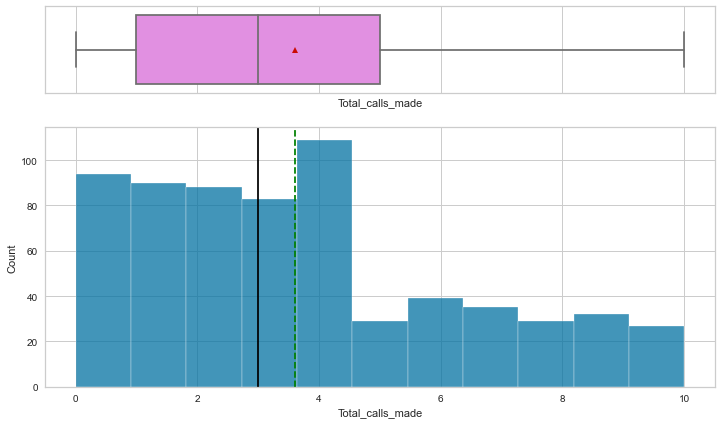

<IPython.core.display.Javascript object>

In [64]:
histogram_boxplot(df, "Total_calls_made")

- Customers made between 0 and 10 calls per year, majority making lees than6 calls

# <a name='link22'>2.2. Bivariate analysis</a>

### Pairplot to visualize interactiona

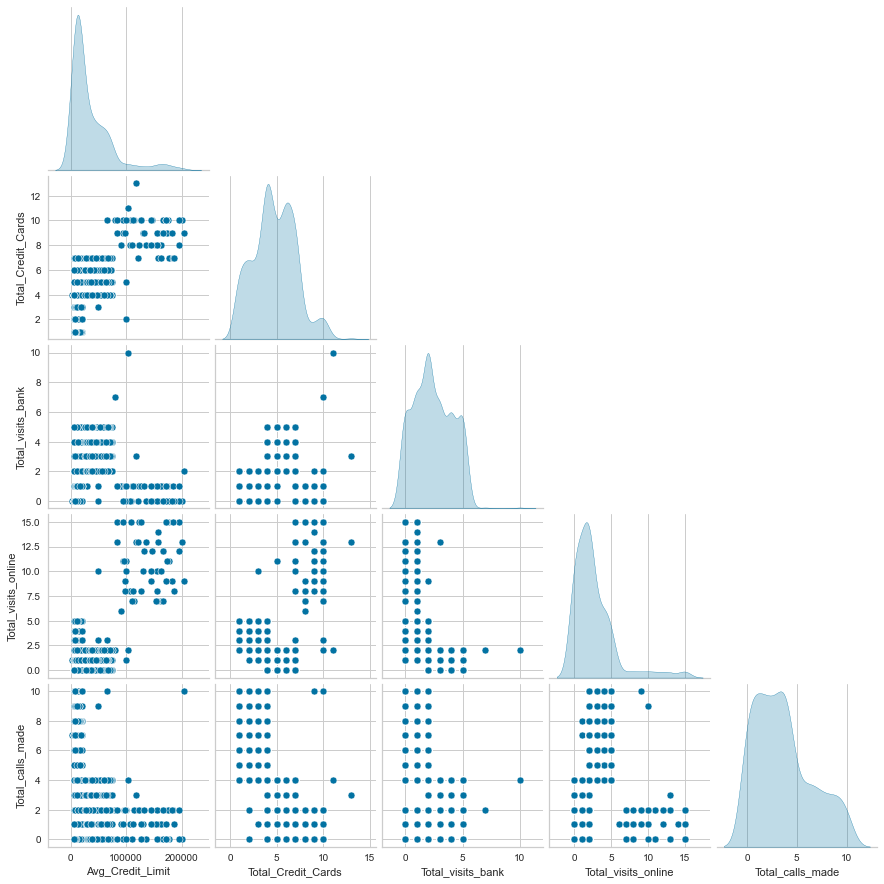

<IPython.core.display.Javascript object>

In [66]:
sns.pairplot(df, diag_kind="kde", corner=True)

**Observations:**
- The distribution of `Total_Credit_Cards` suggests four groups in  the dataset.
- There seem to be a positive relation between `Avg_Credit_Limit` and `Total_Credit_Cards`, `Avg_Credit_Limit` and `Total_visits_online`.

### Heatmap to see correlations

<AxesSubplot:>

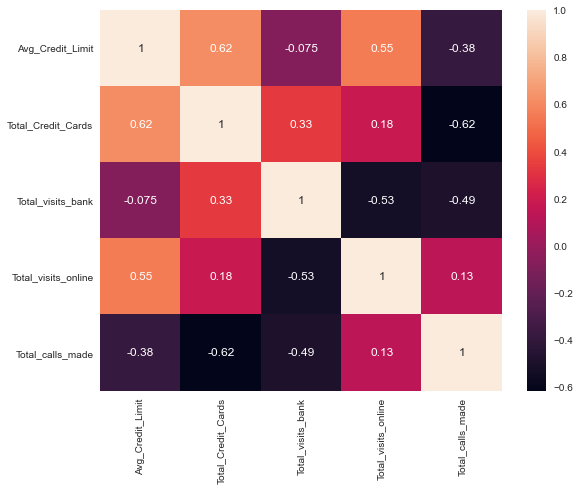

<IPython.core.display.Javascript object>

In [73]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), annot=True)

- ` Total _Credit_Cards` and `Total_calls_made` are negatively correlated: The more credit card a customer has, the less visits to the bank he makes.
- `Total_visits_bank` and `Total_visits_online` are also negatively correlated: The more vistis to the bank, the less online visits.
-  Our correlations assumptions made above are confirmed as well.

# <a name='link3'>3. Data preprocessing</a>

In [77]:
# Scaling the dataset and making a new dataframe of the scaled data

df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(data=df_scaled, columns=df.columns, index=df.index)

<IPython.core.display.Javascript object>

In [79]:
df_scaled.mean()

Avg_Credit_Limit       1.694997e-17
Total_Credit_Cards     1.093612e-15
Total_visits_bank      8.458035e-16
Total_visits_online   -2.556055e-16
Total_calls_made      -6.352849e-16
dtype: float64

<IPython.core.display.Javascript object>

Variables now have an almost zero mean.

In [80]:
df_scaled.std()

Avg_Credit_Limit       1.000764
Total_Credit_Cards     1.000764
Total_visits_bank      1.000764
Total_visits_online    1.000764
Total_calls_made       1.000764
dtype: float64

<IPython.core.display.Javascript object>

All variables' standard deviation are now equal 1.

# <a name='link4'>4. Modeling</a>

## <a name='link41'>4.1. K-means Clustering</a>

### Checking the optimal number of clusters with the ebow method

C:\Users\pdach\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 1.9987535519850106
Number of Clusters: 2 	Average Distortion: 1.4592168455688794
Number of Clusters: 3 	Average Distortion: 1.147437016229722
Number of Clusters: 4 	Average Distortion: 1.0494510243907649
Number of Clusters: 5 	Average Distortion: 0.9939300422440552
Number of Clusters: 6 	Average Distortion: 0.9470370119552
Number of Clusters: 7 	Average Distortion: 0.9134509877898628
Number of Clusters: 8 	Average Distortion: 0.8938321656243221
Number of Clusters: 9 	Average Distortion: 0.8753362541694106
Number of Clusters: 10 	Average Distortion: 0.847253538114619
Number of Clusters: 11 	Average Distortion: 0.8360846372397689


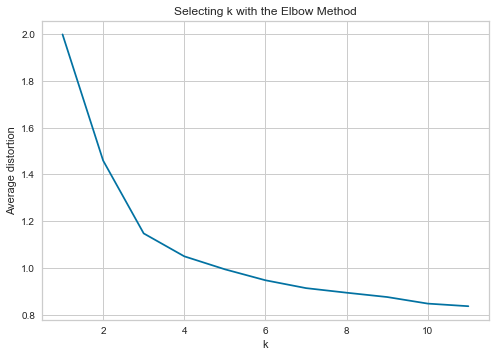

<IPython.core.display.Javascript object>

In [89]:
num_clusters = range(1, 12)
meanDistortions = []

for k in num_clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_scaled)
    prediction = model.predict(df_scaled)
    distortion = (
        sum(np.min(cdist(df_scaled, model.cluster_centers_, "euclidean"), axis=1))
        / df_scaled.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(num_clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

According to the graph, 3 or 4 can be chosen as number of clusters.

### Checking the optimal number of clusters by comparing the silhouette scores

For n_clusters = 2, the silhouette score is 0.4127406225708575)
For n_clusters = 3, the silhouette score is 0.5105444622928512)
For n_clusters = 4, the silhouette score is 0.3518566809513995)
For n_clusters = 5, the silhouette score is 0.2686500349169536)
For n_clusters = 6, the silhouette score is 0.2509293681081193)
For n_clusters = 7, the silhouette score is 0.24653233167137753)
For n_clusters = 8, the silhouette score is 0.2252447857487193)
For n_clusters = 9, the silhouette score is 0.21848745617461088)
For n_clusters = 10, the silhouette score is 0.2190609298910897)
For n_clusters = 11, the silhouette score is 0.21099946494867586)


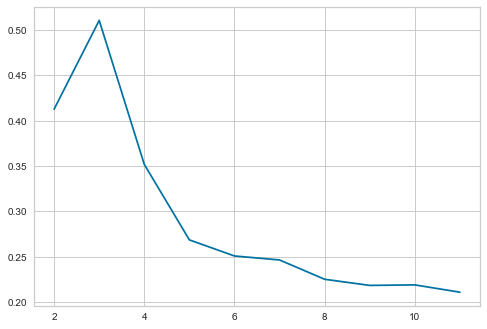

<IPython.core.display.Javascript object>

In [88]:
silhouettes = []
cluster_list = range(2, 12)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=2)
    preds = clusterer.fit_predict((df_scaled))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df_scaled, preds)
    silhouettes.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, silhouettes)
plt.show()

The silhouette score is highest for a number of clusters equal to three.

## Indepth analyzing of the silhouette resulst to decide the number of clusters

### Case 1: Three clusters

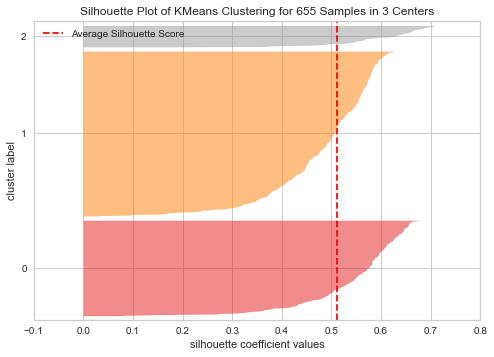

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 655 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [135]:
# finding optimal no. of clusters with silhouette coefficients
visualizer3 = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer3.fit(df_scaled)
visualizer3.show()

In [136]:
visualizer3.silhouette_score_

0.5105444622928512

<IPython.core.display.Javascript object>

In [137]:
min(visualizer3.silhouette_samples_), max(visualizer3.silhouette_samples_)

(0.02851392137220656, 0.7058423620338922)

<IPython.core.display.Javascript object>

In [235]:
len(visualizer3.silhouette_samples_[visualizer3.silhouette_samples_ > 0.5])

410

<IPython.core.display.Javascript object>

**Notes:**
- Average silhouette score when considering 3 clusters is 0.51 with a minimum of 0.028 and a maximum of 0.70.
- 410 observations thant is more than 62% of the total observations have a silhouette score greater than 0.5

### Case 2:  Four clusters

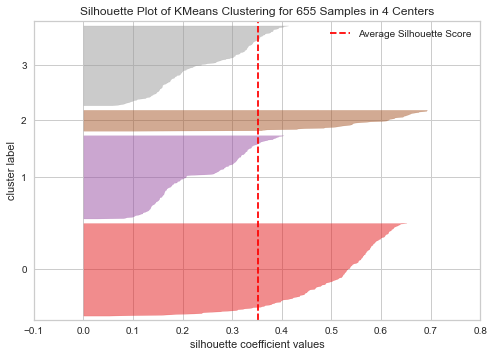

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 655 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [146]:
# finding optimal no. of clusters with silhouette coefficients
visualizer4 = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer4.fit(df_scaled)
visualizer4.show()

In [141]:
visualizer4.silhouette_score_

0.3518566809513995

<IPython.core.display.Javascript object>

In [142]:
min(visualizer4.silhouette_samples_), max(visualizer4.silhouette_samples_)

(0.027616174069512445, 0.6925538092741492)

<IPython.core.display.Javascript object>

In [143]:
len(visualizer4.silhouette_samples_[visualizer4.silhouette_samples_ > 0.5])

178

<IPython.core.display.Javascript object>

**Notes:**
- Average silhouette score when considering 4 clusters is 0.35 with a minimum of 0.027 and a maximum of 0.69.
- 178 observations that is more than one-third of the total observations have a silhouette score greater than 0.5
- Copmaring to the above observations, we think 3 clusters is the appropriate number.

## Fitting the K-means model

In [162]:
# Fiiting K-means objest with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=0)

<IPython.core.display.Javascript object>

In [163]:
# Checking the number of observations per cluster

from collections import Counter

Counter(kmeans.labels_)

Counter({0: 383, 1: 222, 2: 50})

<IPython.core.display.Javascript object>

In [165]:
# Adding K-means clusters labels to the original and scaled dataframes

df["Segments"] = kmeans.labels_
df_scaled["Segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

## <a name='link42'>4.2. Hierarchical Clustering</a>

### Checking cophenetic coefficients with differents distnaces and linkage methods.

In [191]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(df_scaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.8801670951719213.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8828079840346841.
Cophenetic correlation for Euclidean distance and average linkage is 0.9167452654545244.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.9125716430539119.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8973844944591916.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8681901983434046.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9150476696820983.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9112065294377069.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8638480127871848.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5016318183645594.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8323695959333299.
Cophenetic co

<IPython.core.display.Javascript object>

In [188]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9167452654545244, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

### Checking the cophenetic coefficients with Euclidien distance only

In [189]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(df_scaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(df_scaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.8801670951719213.
Cophenetic correlation for complete linkage is 0.8828079840346841.
Cophenetic correlation for average linkage is 0.9167452654545244.
Cophenetic correlation for centroid linkage is 0.9133343298322683.
Cophenetic correlation for ward linkage is 0.7628245738693225.
Cophenetic correlation for weighted linkage is 0.9125716430539119.


<IPython.core.display.Javascript object>

## Plotting different dendrograms

Since the Euclidien distance gives the highest cophenetic correlation coefficients, we are only going to plot dendrograms with that distance.

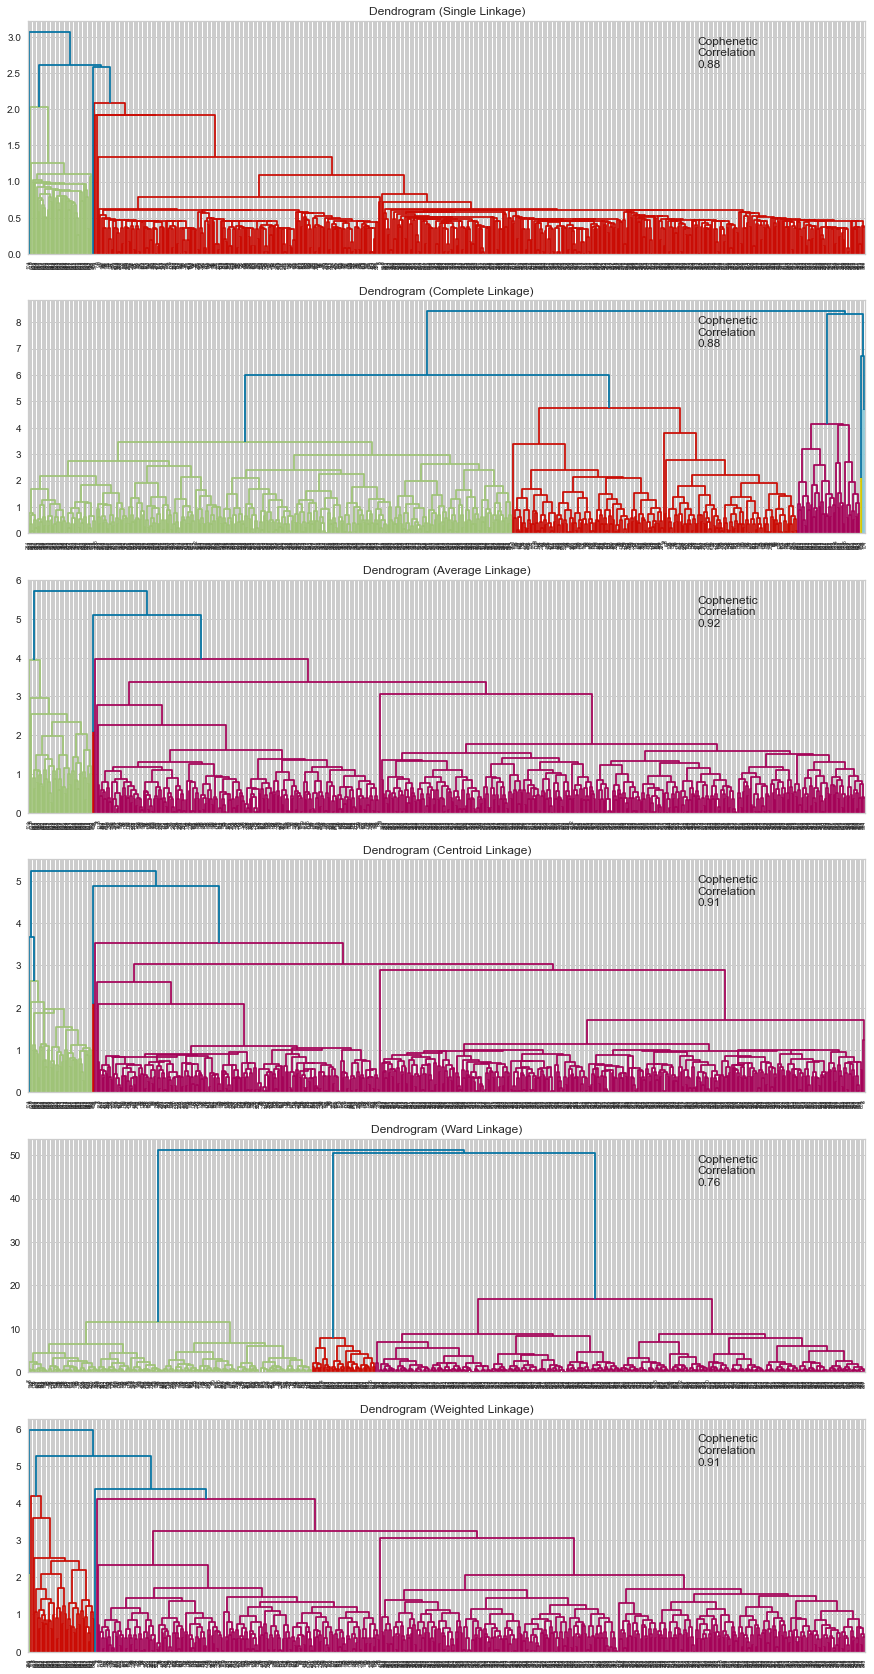

<IPython.core.display.Javascript object>

In [192]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(df_scaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(df_scaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Notes:**
- The dendrogram with Ward linkage displays three well separte clusters.
- although not that well separated, we can see three clusters emerging from the dendrograms with Centroid and Average linkages as well.
- Hence, we choose three as our optimal number of clusters. This is consistant with the result obtained with K-means clustering.

## Fitting the model with appropriate number of clusters

In [213]:
# Creating and fitting the Hierarchical clustering object.

Aggl = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
Aggl.fit(df_scaled)

AgglomerativeClustering(n_clusters=3)

<IPython.core.display.Javascript object>

In [214]:
# adding hierarchical cluster labels to dataframes with original and scaled data.

df_scaled["HC_Clusters"] = Aggl.labels_
df["HC_Clusters"] = Aggl.labels_

<IPython.core.display.Javascript object>

## <a name='link43'>4.3. Comparing K-means and Hierarchical Clustering</a>

In [221]:
# Check the number of observations per cluster in the K-means clustering result
df["Segments"].value_counts()

0    383
1    222
2     50
Name: Segments, dtype: int64

<IPython.core.display.Javascript object>

In [223]:
# Check the number of observations per cluster in the K-means clustering result
df["HC_Clusters"].value_counts()

0    383
2    222
1     50
Name: HC_Clusters, dtype: int64

<IPython.core.display.Javascript object>

In [227]:
# Check if all observations labeled 1 in K-means are the same labeled 2 in Hierarchical clustering
df[df["Segments"] == 1]["HC_Clusters"].value_counts()

2    222
Name: HC_Clusters, dtype: int64

<IPython.core.display.Javascript object>

In [228]:
# Check if all observations labeled 2 in K-means are the same labeled 1 in Hierarchical clustering
df[df["Segments"] == 2]["HC_Clusters"].value_counts()

1    50
Name: HC_Clusters, dtype: int64

<IPython.core.display.Javascript object>

**Observations:**
- The two clustering methods (K-means and Hierarchical clustering) resulted in the same number of clusters ( that is 3 clusters).
- Basically, the clusters are the same for the two methods, only difference lies on the labelling: Both methods labelled the same class as 0 with the same numbers of observations (383 obervations), cluster labelled 1 for K-means is labelled 2 for Hierarchical clustering with the same 222 observations and the last clusters have 50 observations each.

## Cluster Profiling

In [231]:
cluster_profile = df.groupby("HC_Clusters").mean()
cluster_profile["count_in_each_segments"] = (
    df.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [232]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Segments,count_in_each_segments
HC_Clusters,,,,,,,
0,34018.276762,5.550914,3.509138,0.992167,2.036554,0,383
1,141720.000000,8.920000,0.680000,10.960000,1.280000,2,50
2,12180.180180,2.405405,0.936937,3.567568,6.851351,1,222


<IPython.core.display.Javascript object>

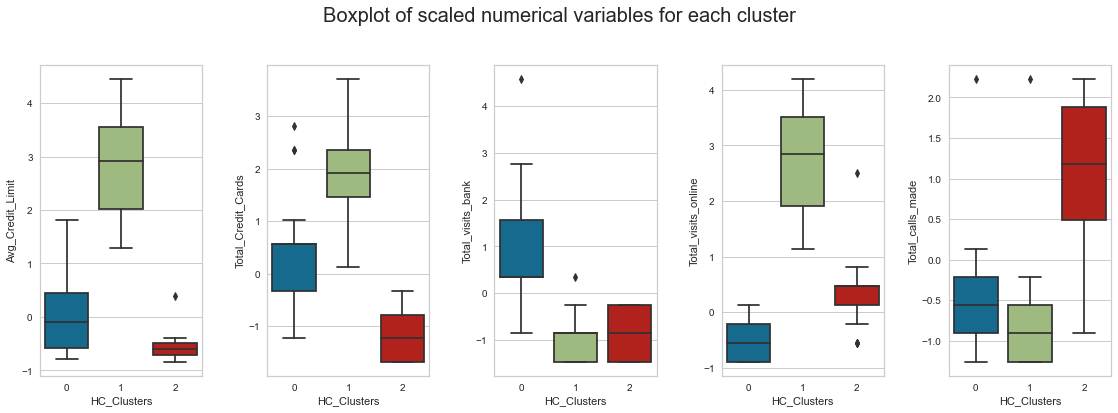

<IPython.core.display.Javascript object>

In [217]:
cols = [
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made",
]

fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=df_scaled[cols[counter]],
        x=df_scaled["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

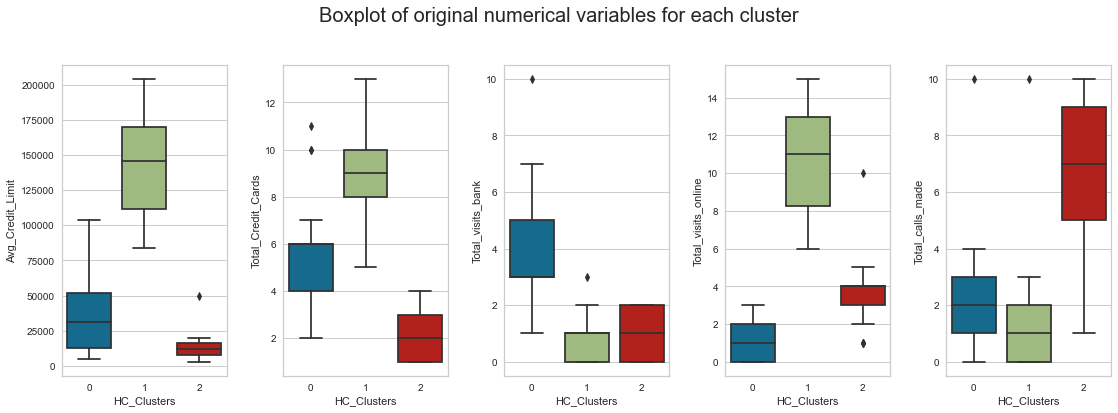

<IPython.core.display.Javascript object>

In [218]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[cols[counter]], x=df["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

### Obervations:

- **Cluster 0**:
    - It is the larger cluster with 383 observations.
    - Customers in this cluster have a medium average credit limit with a mean of 34018.
    - Customers in this cluster have typically between 4 to 6 credit cards.
    - The cluster contains customers with highest number of visits to the bank and lowest visits online.
    - Cluster contains medium volume callers with typically 3 to 5 total calls.
    
- **Cluster 1 (labelled 1 in Hierarchical clustering and 2 in K-means clustering)**:
    - This is the smaller clusterwith only 50 observations.
    - Cluster contains customers with higher average credit limit, typically above 110,000 and high number of credit cards between 8 to 10 credit cards. This confirms the positive relationship between `Avg_Credit_Limit` and `Total_Credit_cards`. 
    - Cluster also contains customers with high number of visits online. This is understandable as they have many credit cards and so will usually go online for example to make payments.
    - Customers in the cluster make less visits in the bank and less calls as well.

- **Cluster 2 (labelled 2 in Hierarchical clustering and 1 in K-means clustering)**:
    - This is the medium size cluster with 222 observations.
    - Individuals in the cluster have the lowest credit limit as well as the lowest number of credit cards.
    - Cluster members also have low visits at the bank (less than 2) as well as online (less than 4).
    - However, cluster members make the most phone calls to the bank.

# <a name='link5'>Conclusion</a>

We have explored the data from AllLife Bank and built two machine learning models to make clusters of the same in other to understand the different profiles of their customers. From the analysis performed, we can retain the following:

- We found moderate correlation between some variables:
    - An obvious positive correlation was found between `Avg_Credit_Limit` and `Total_Credit_Cards`. In fact, as one has more credit cards, the credit limit increases.
    - A positive correlation between `Avg_Credit_Limit` and `Total_visits_online` suggesting as credit limit increases, customers prefer online banking. One reason to this can be visits for the purpose of making their payments, but a deeper investigation needs to be conducted to better understand this behavior as the correlation with `Total_Credit_Cards` is not significant to totally back the assumption we make.
    - As the number of credit increases, customers tend to make more in bank visits, moderate online. In the contrary, the increase in the number of cards inducts a decrease in the number of calls.
    
The two clustering models we built gave us the same clusters of the dataset, that is three clusters with the same observations. This show the consistancy of the analysis performed and thus the results obtained.